In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os 
sys.path.append("../../")
import numpy as np

from data_loading import load_runs

In [3]:
from microfit.histogram import Binning, MultiChannelBinning

numu_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "Neutrino reconstructed energy (GeV)")
# numu_binning = Binning.from_config("muon_theta", 14, (-1.0, 1.0), "muon $\\cos(\\theta)$")
numu_binning_np = numu_binning.copy()
numu_binning_np.label = "NUMUCRTNP0PI"
numu_binning_np.set_selection(preselection="NUMUCRT", selection="NUMUCRTNP0PI")

numu_binning_zpi = numu_binning.copy()
numu_binning_zpi.label = "NUMUCRT0P0PI"
numu_binning_zpi.set_selection(preselection="NUMUCRT", selection="NUMUCRT0P0PI")

sideband_binning = MultiChannelBinning([numu_binning_np, numu_binning_zpi])

In [17]:
RUNs = ["3_crt", "4b", "4c", "4d", "5"]

rundata_numu, mc_weights_numu, data_pot_numu = load_runs(
    RUNs,
    data="bnb",
    truth_filtered_sets=["nue", "drt"],
    loadshowervariables=False,
    loadrecoveryvars=False,
    loadsystematics=True,
    use_bdt=False,
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=True,
    blinded=False, 
    enable_cache=True,
)

Loading run 3_crt
Loading run 4b
Loading run 4c
Loading run 4d
Loading run 5


Making plots for mc
Making plots for nue
Making plots for nc_pi0
Making plots for mc
Making plots for nue
Making plots for nc_pi0


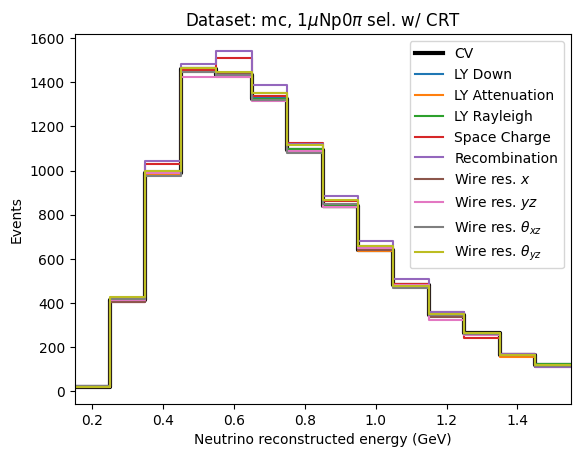

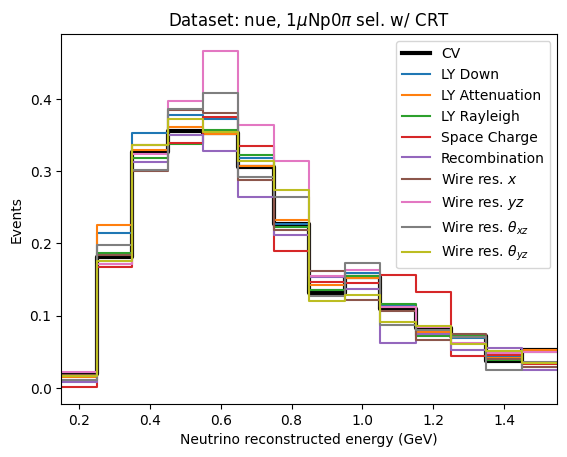

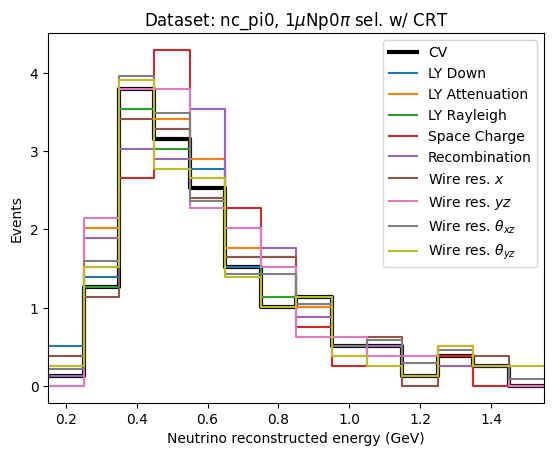

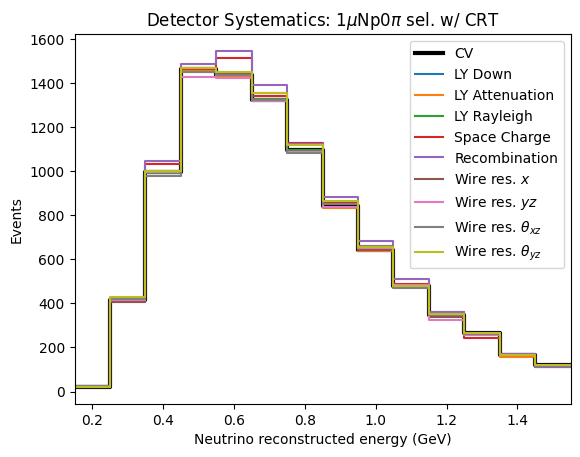

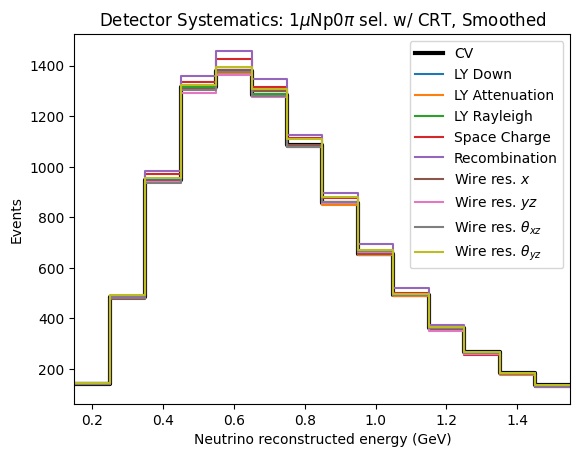

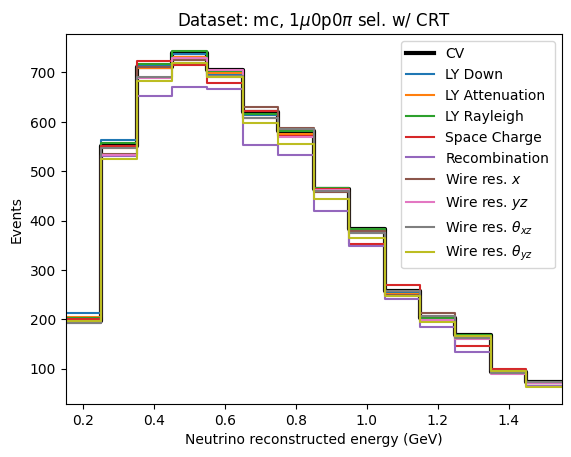

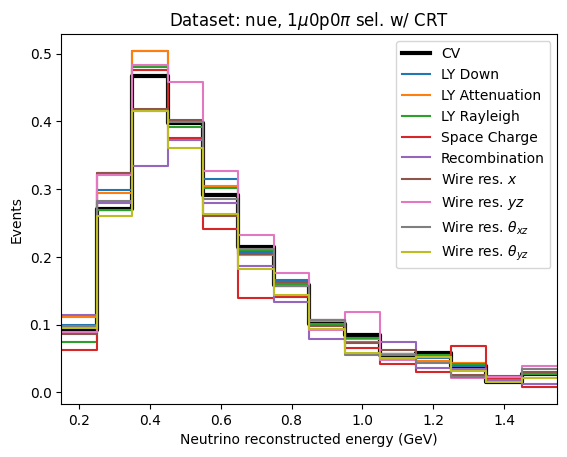

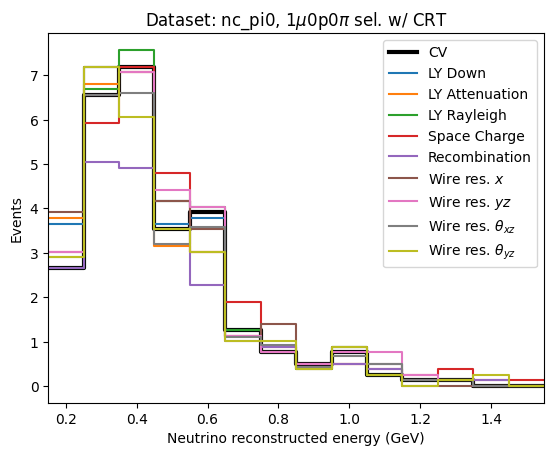

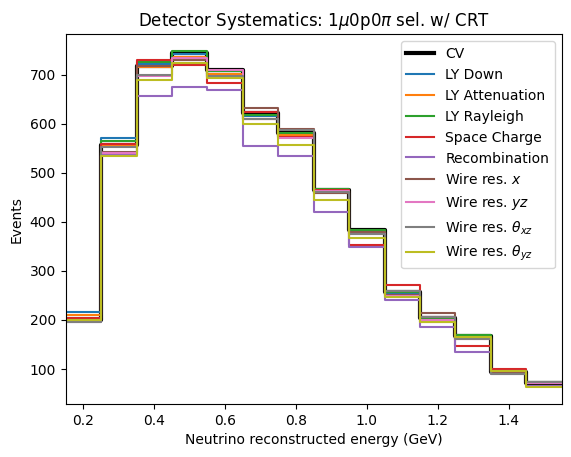

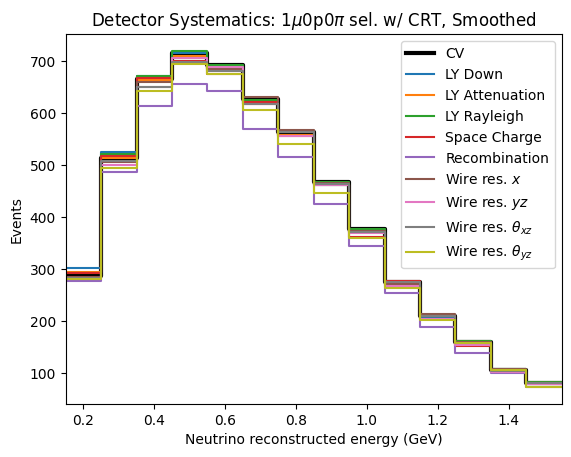

In [18]:
from microfit.detsys import make_variations

numu_sideband_detvars = make_variations(
    RUNs,
    "bnb",
    binning=sideband_binning,
    make_plots=True,
    enable_detvar_cache=True,
    # Truth filter is the only difference w.r.t. the standard data (see config file)
    truth_filtered_sets=["nue","nc_pi0"],
    loadshowervariables=False,
    loadrecoveryvars=False,
    loadsystematics=True,
    use_bdt=False,
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=True,
    blinded=False, 
    enable_cache=True,
    detvar_cache_dir="split_run_plots_output/numu_sideband_detvars/cache",
    plot_output_dir="split_run_plots_output/numu_sideband_detvars/plots",
)

In [7]:
from microfit.histogram import RunHistGenerator
from microfit.run_plotter import RunHistPlotter

numu_sideband_generator = RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
    uncertainty_defaults=None,
    detvar_data=numu_sideband_detvars
)

../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


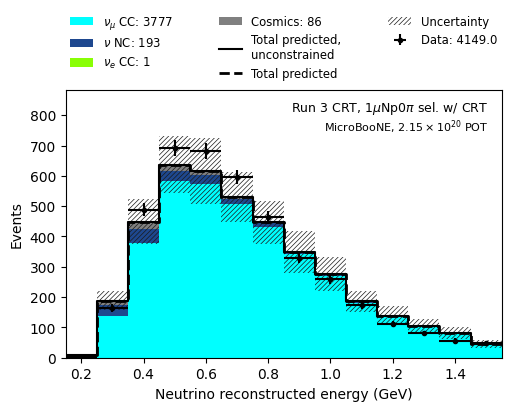

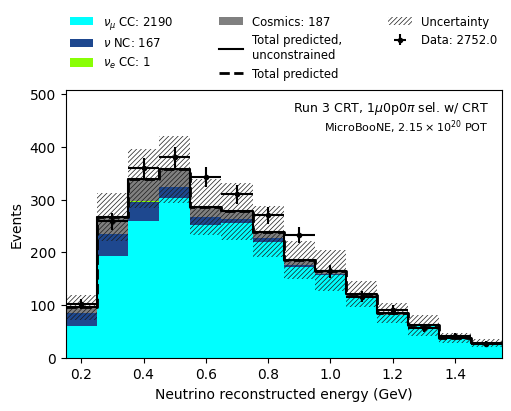

In [9]:
import matplotlib.pyplot as plt

for channel in numu_sideband_generator.channels:
    RunHistPlotter(numu_sideband_generator).plot(
        category_column="paper_category_numu",
        include_multisim_errors=True,
        add_precomputed_detsys=True,
        run_title="Run 3 CRT",
        mb_preliminary=False,
        channel=channel,
        figsize=(5, 4)
    )
    plt.savefig(f"split_run_plots_output/numu_sideband_{channel}_run{RUN}.pdf")

Loading run 3_crt
Making plots for mc
Making plots for nue
Making plots for nc_pi0
Making plots for mc
Making plots for nue
Making plots for nc_pi0


../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")
../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


Loading run 4b
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/Detvar_BNB_nu_pandora_reco2_CV_run4_reco2_ana.root


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/run4_bnb_intrinsic_nue_detvar_cv_pandora_unified_reco2_reco2_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_CV_reco2_v08_00_00_38_run3b_reco2_reco2.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/run4_5_bnb_nu_overlay_detvar_LYDown_reco2_pandora_unified_run4_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/Run_4_BNB_Nue_Detvar_LY_Down_Pandora_Reco2_Run4_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_LYDown_v08_00_00_37_run3b_reco2_reco2.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/Run_4_BNB_Nu_Detvar_LYAttenuation_Pandora_Reco2_run4_ana.root
Loading data from: /exp/uboone/data

/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/run4_bnb_intrinsic_nue_detvar_wire_mod_yz_Pandora_reco2_reco2_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3b_reco2_reco2.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/run4_bnb_nu_detvar_Pandora_WireMod_Theta_XZ_reco2_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/run4_bnb_intrinsic_nue_detvar_WireModThetaXZ_pandora_reco2_run4_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_WireModAngleXZ_v08_00_00_38_run3b_reco2_reco2_ntuples.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run4_detvar/numupresel/run4_bnb_nu_detvar_Pandora_WireMod_Theta_YZ_reco2_ana.root
Loading dat

../../microfit/detsys.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")
../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


Loading run 4c
Making plots for mc
Making plots for nue
Making plots for nc_pi0
Making plots for mc
Making plots for nue
Making plots for nc_pi0


../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")
../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


Loading run 4d
Making plots for mc
Making plots for nue
Making plots for nc_pi0
Making plots for mc
Making plots for nue
Making plots for nc_pi0


../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")
../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


Loading run 5
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/run5_DetVar_bnb_CV_Pandora_Unified_reco2_run5_ana.root


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/run5_bnb_intrinsic_nue_detvar_cv_pandora_unified_reco2_reco2_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_CV_reco2_v08_00_00_38_run3b_reco2_reco2.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/run4_5_bnb_nu_overlay_detvar_LYDown_reco2_pandora_unified_run5_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/Run_5_BNB_Nue_Detvar_LYDown_Pandora_Reco2_run5_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_LYDown_v08_00_00_37_run3b_reco2_reco2.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/Run_5_BNB_Nu_Detvar_LYAttenuation_Pandora_Reco2_run5_ana.root
Loading data from: /exp/uboone/data/

/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/Run5_BNB_Nue_Detvar_WireModYZ_Pandora_Reco2_reco2_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3b_reco2_reco2.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/run5_bnb_nu_detvar_Pandora_WireMod_Theta_XZ_reco2_reco2_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/Run_5_BNB_Nue_Pandora_DetVar_WireMod_ThetaXZ_fix_reco2_ana.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/prodgenie_nc_pi0_overlay_DetVar_WireModAngleXZ_v08_00_00_38_run3b_reco2_reco2_ntuples.root
Loading data from: /exp/uboone/data/users/cthorpe/PELEE_2023_Samples/run5_detvar/numupresel/run5_bnb_nu_detvar_Pandora_WireMod_Theta_YZ_reco2_reco2_ana.root
Loading data from: /

../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")
../../microfit/run_plotter.py:132: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


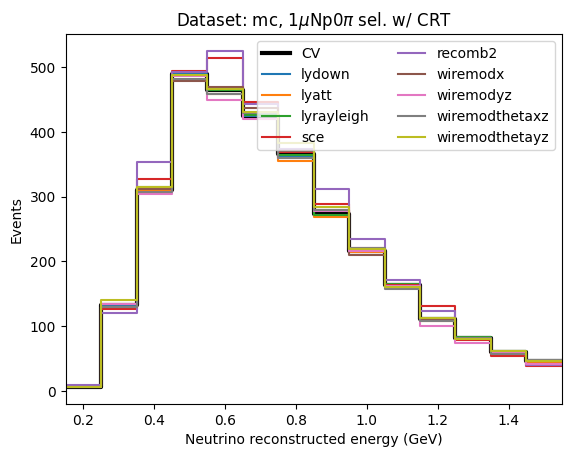

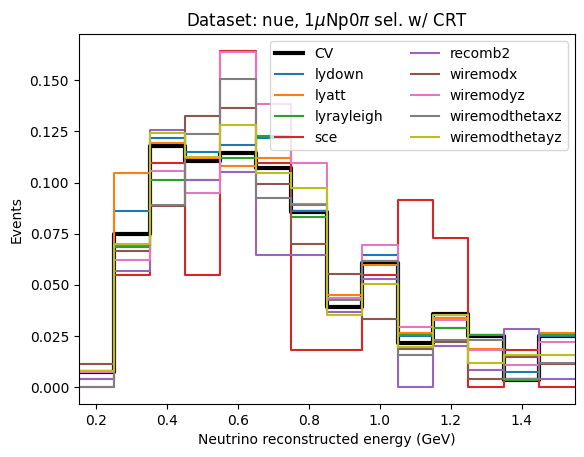

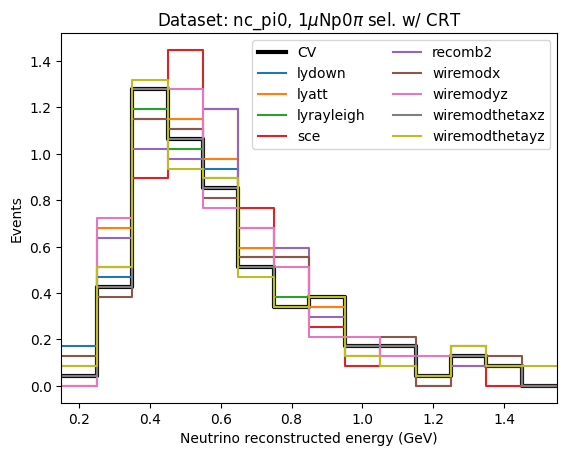

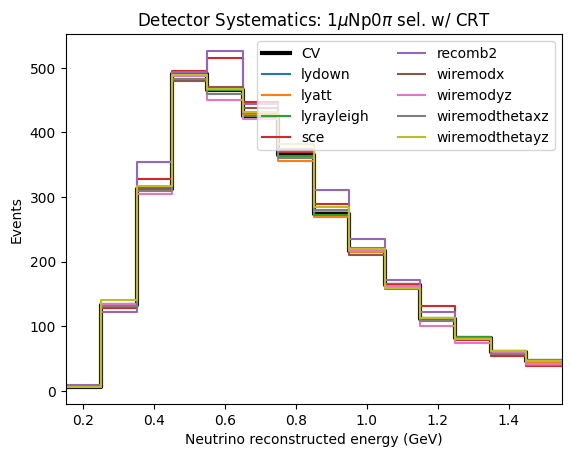

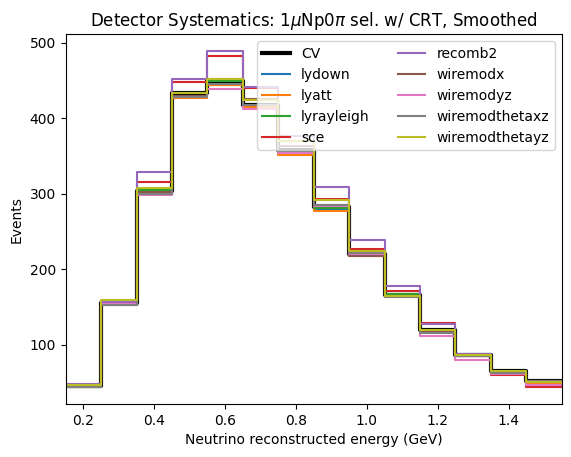

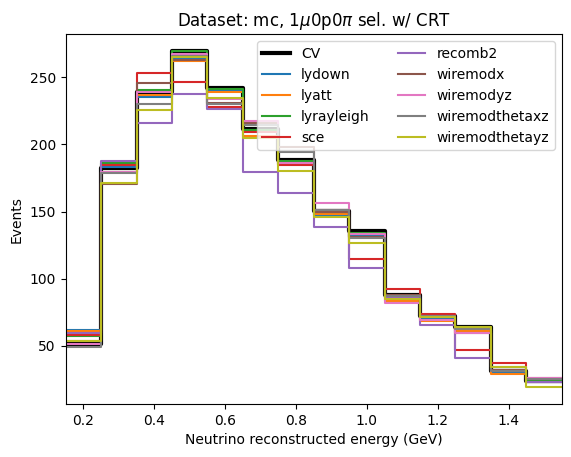

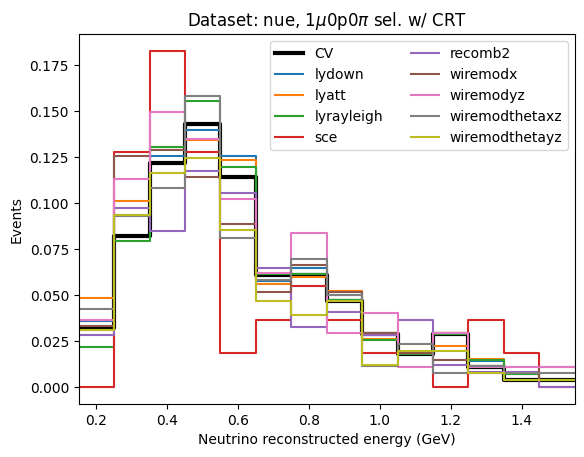

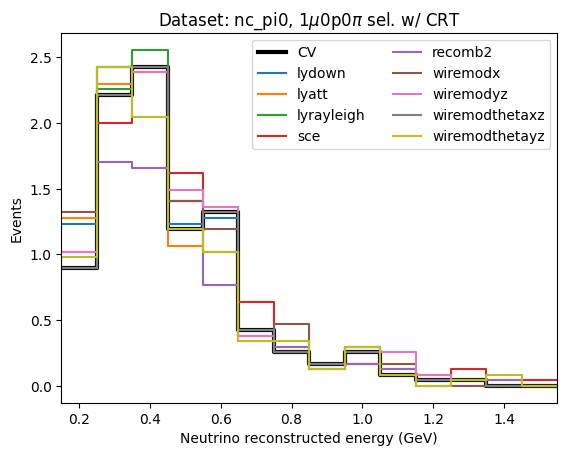

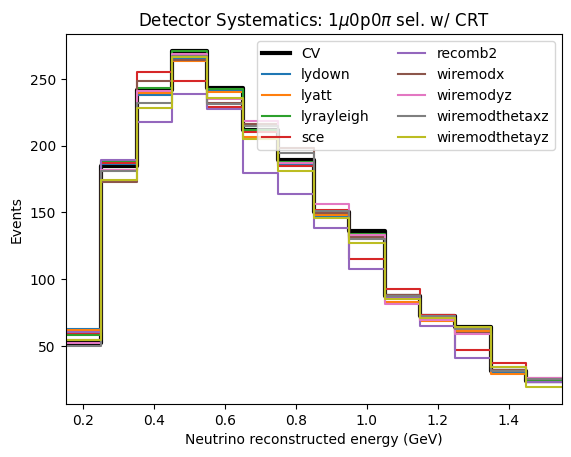

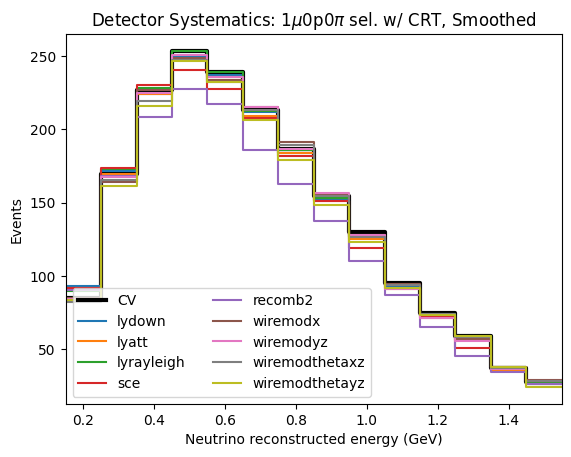

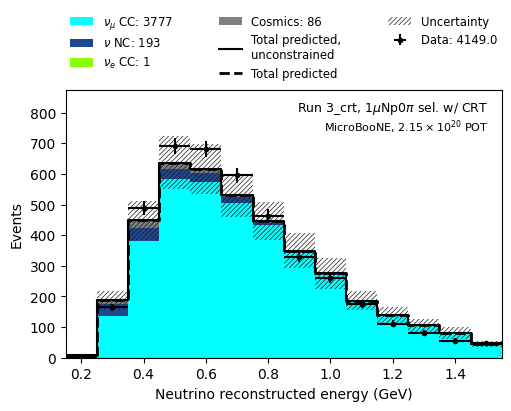

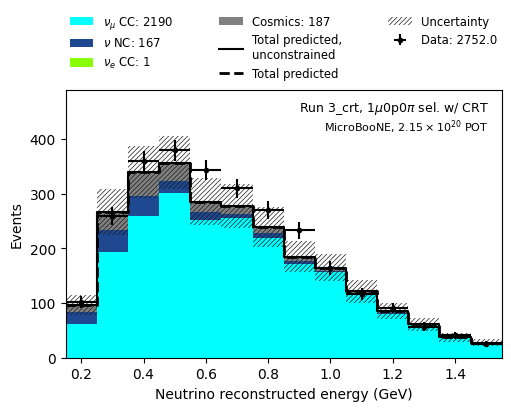

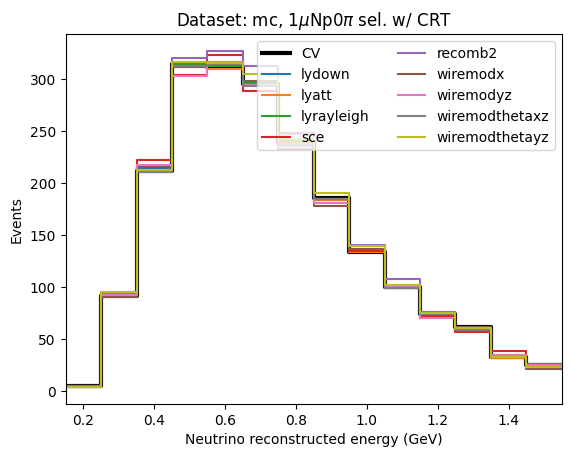

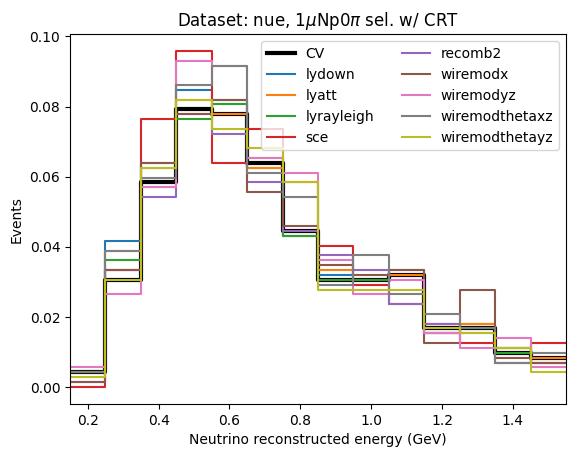

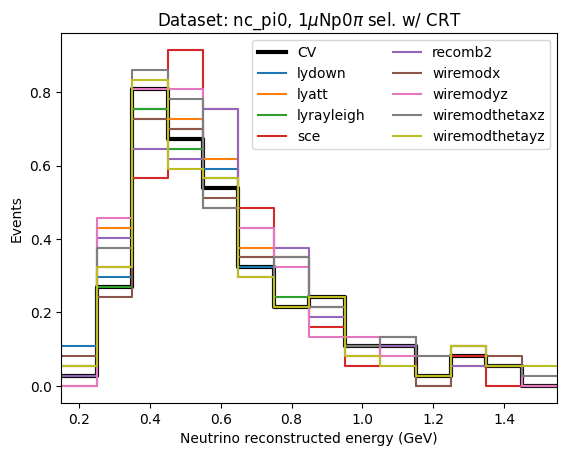

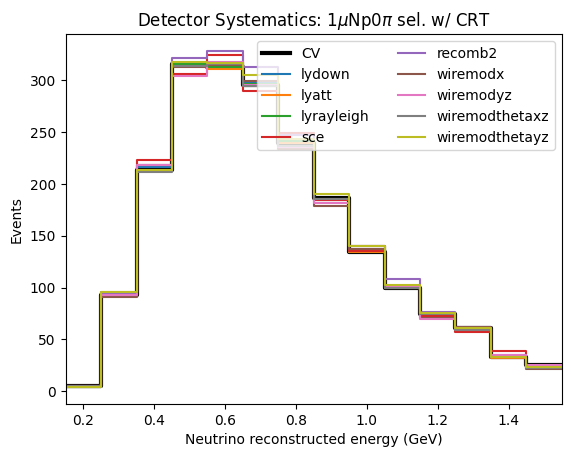

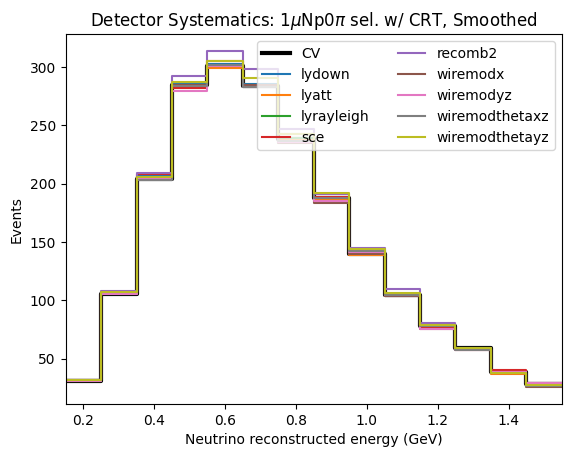

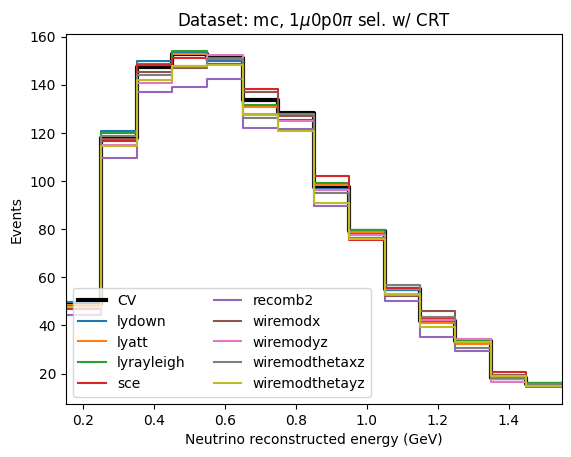

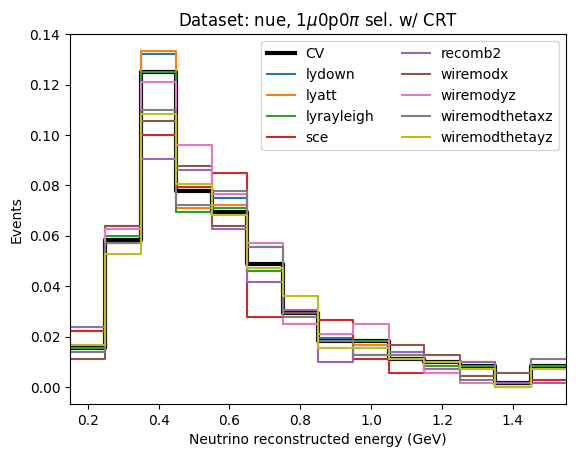

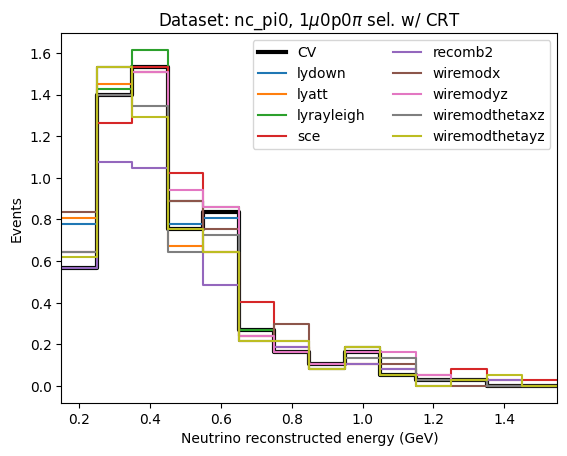

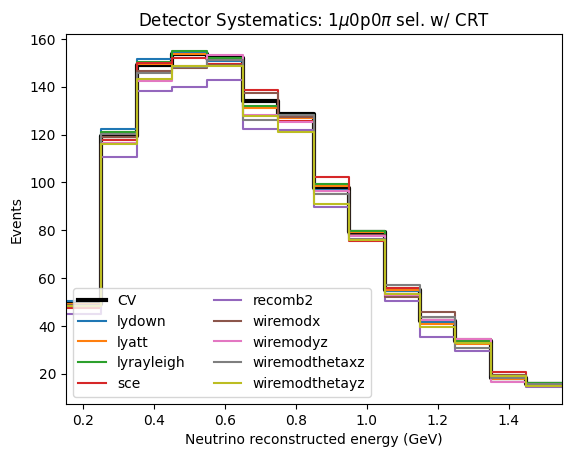

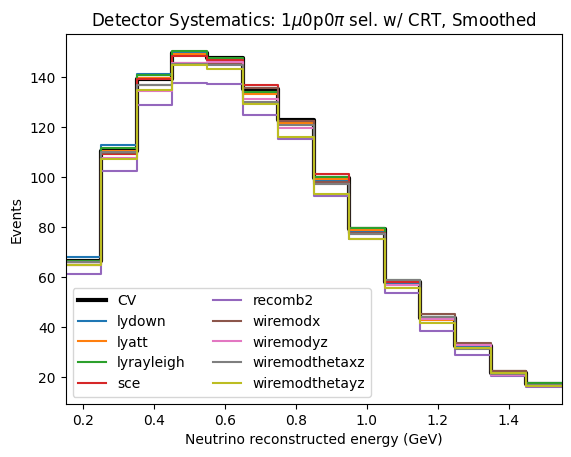

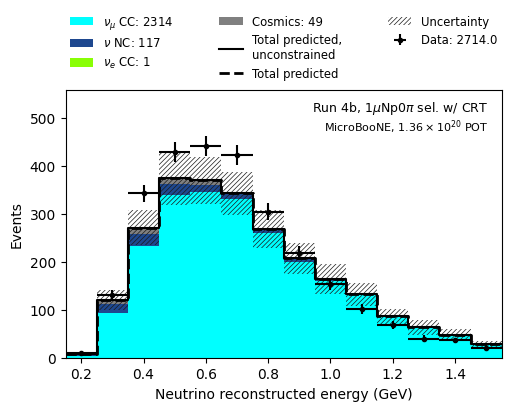

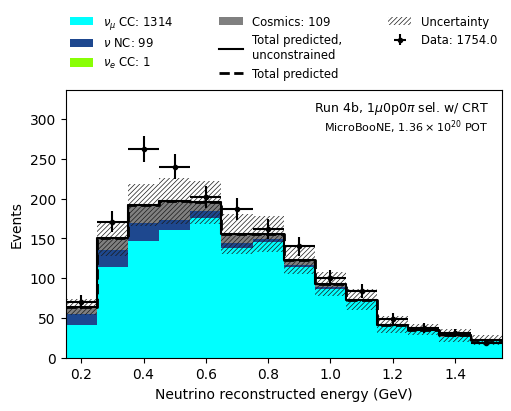

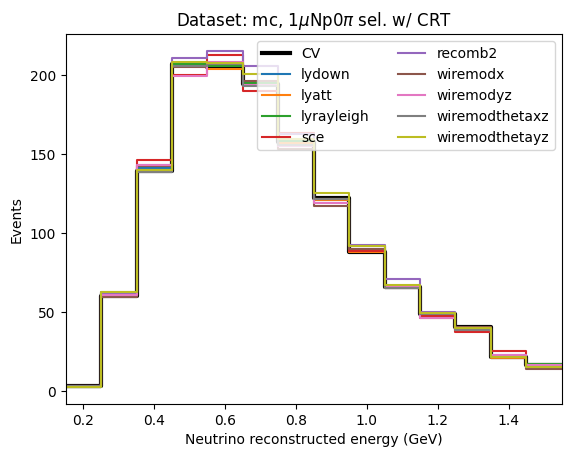

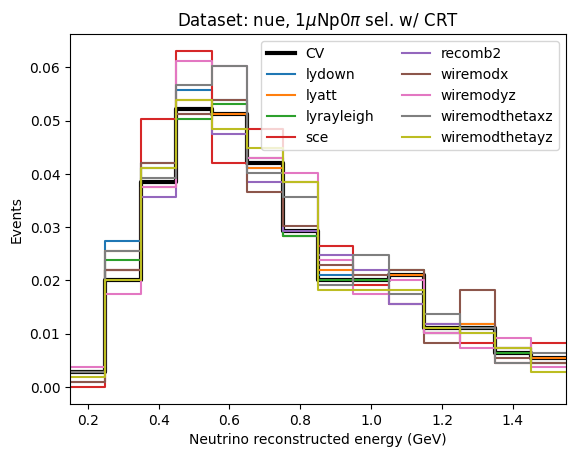

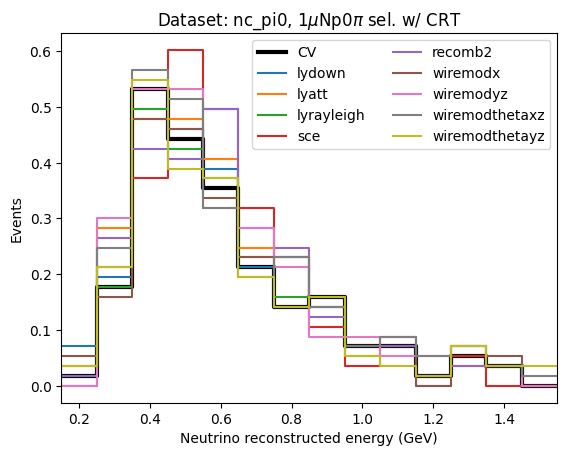

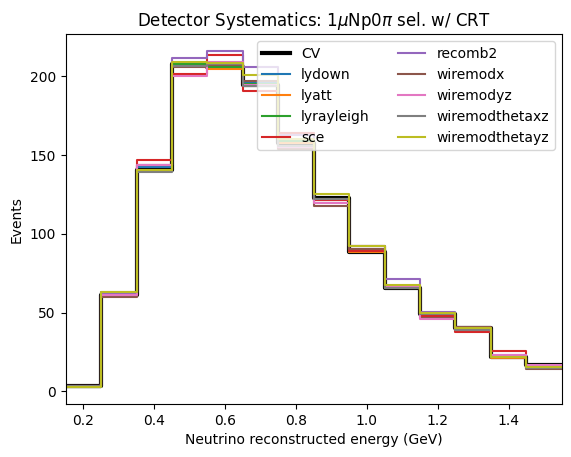

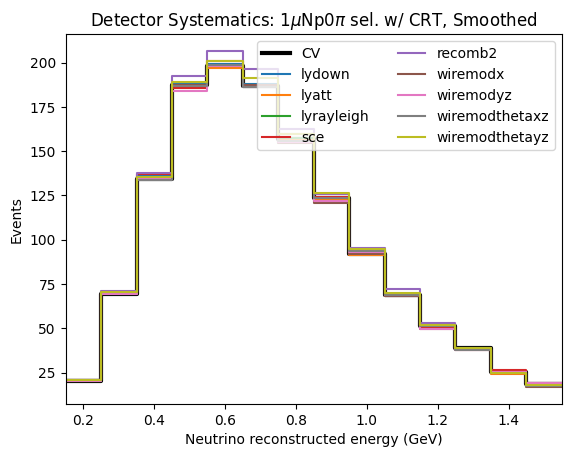

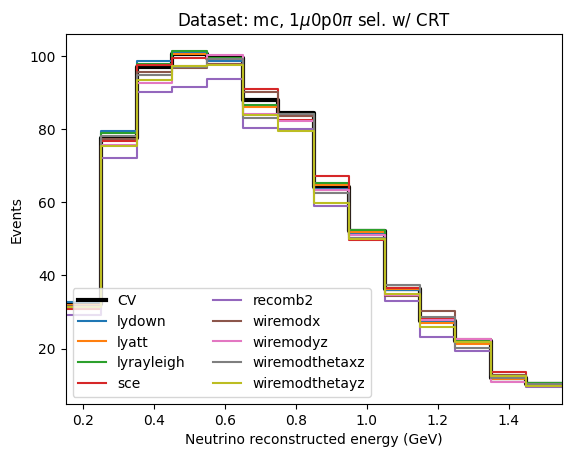

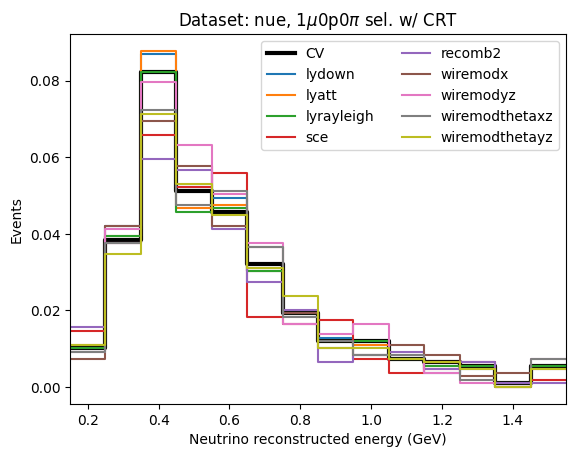

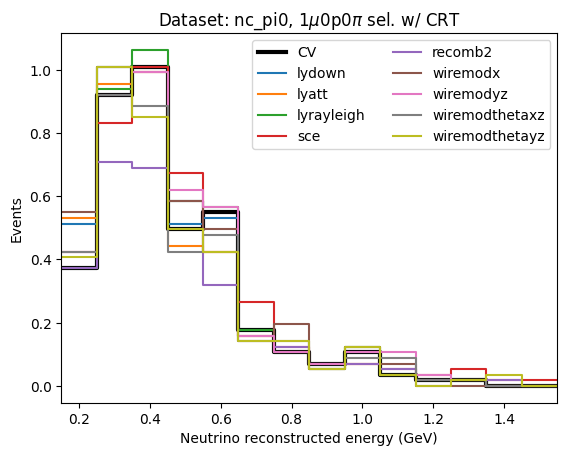

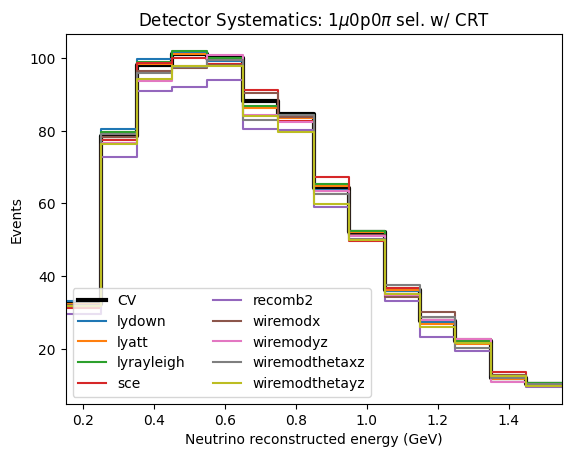

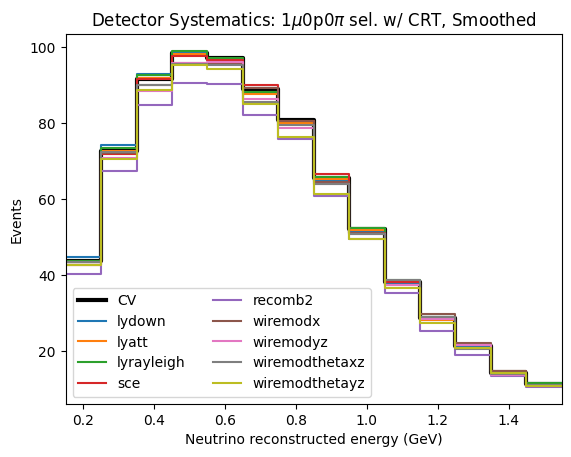

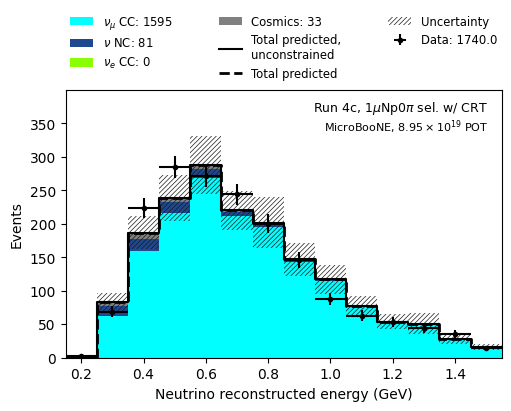

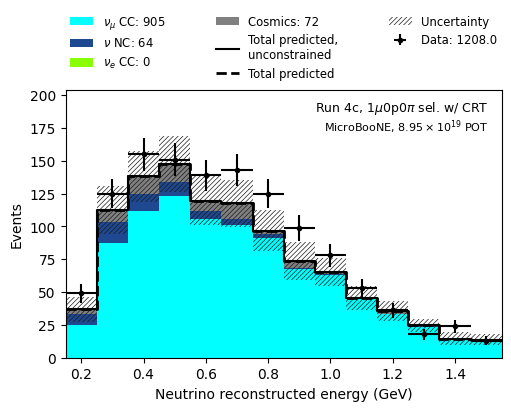

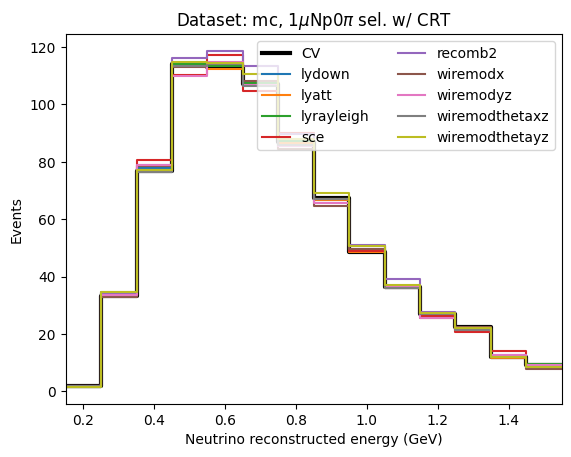

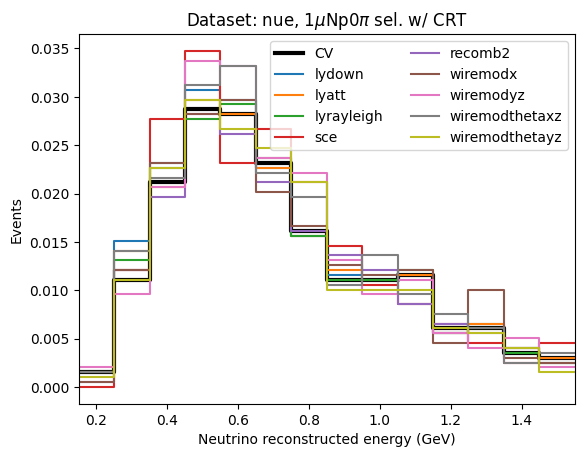

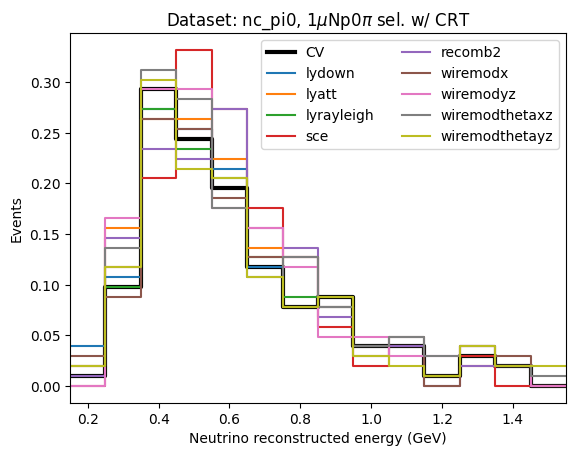

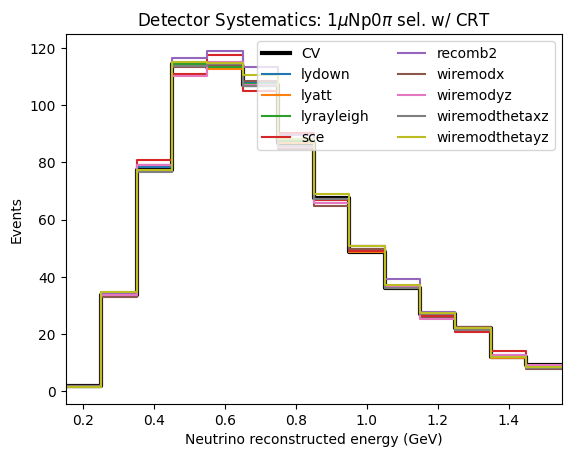

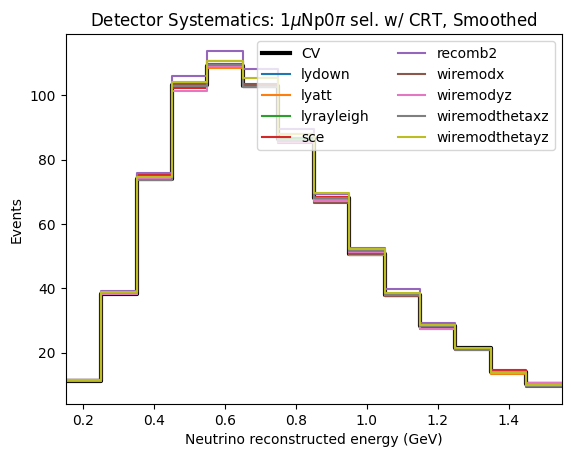

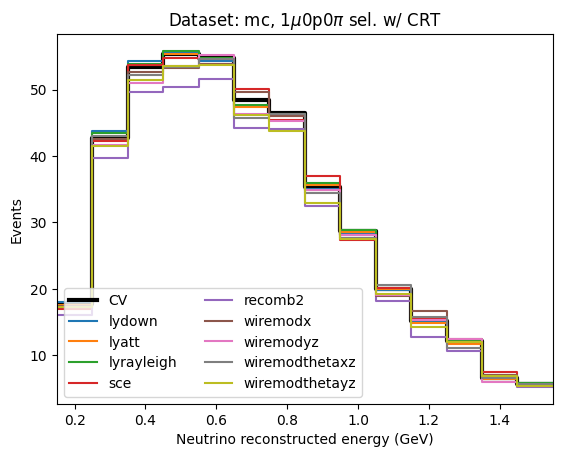

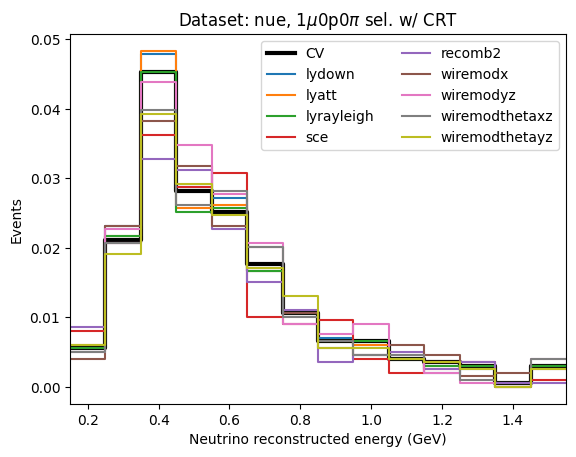

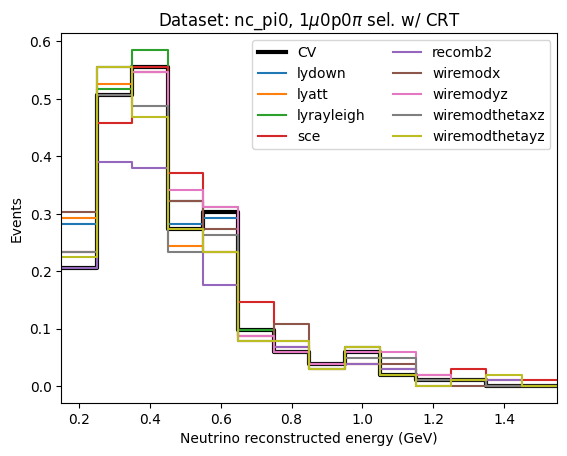

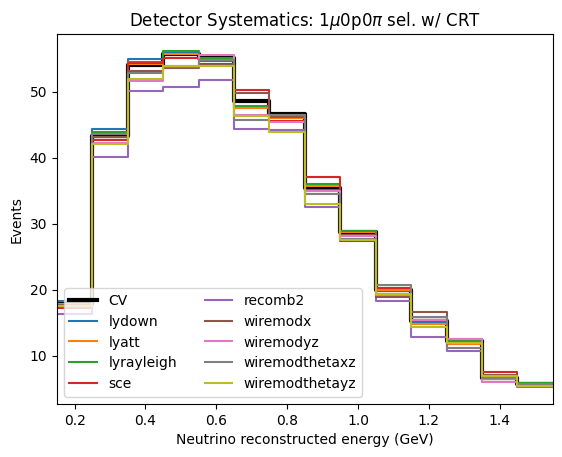

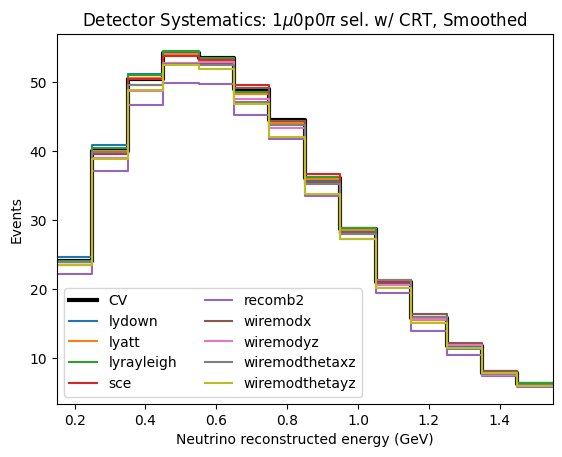

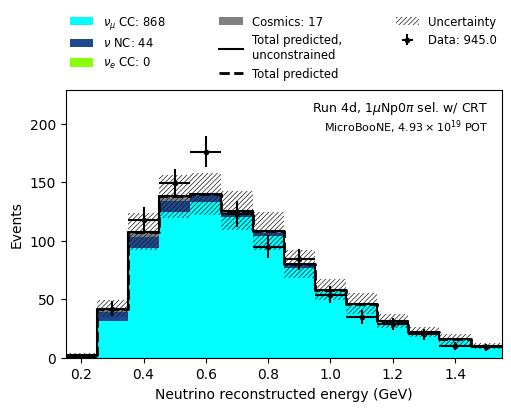

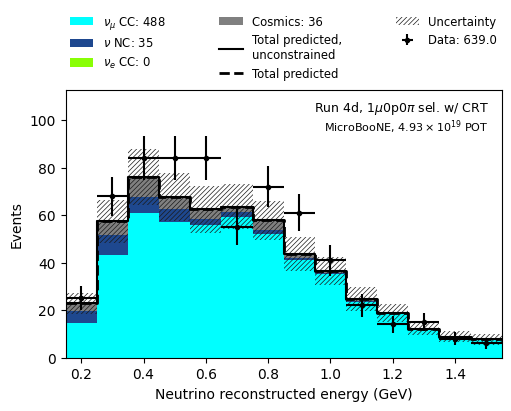

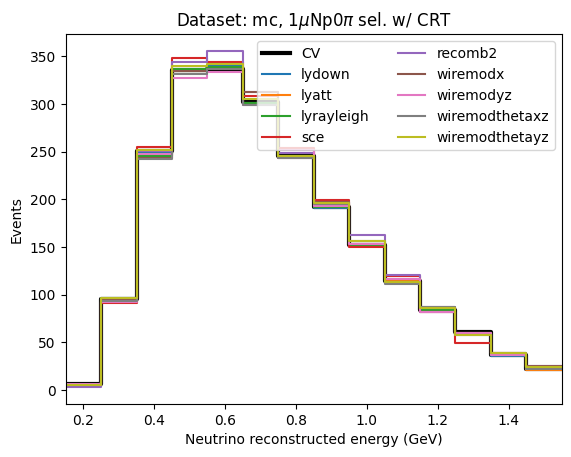

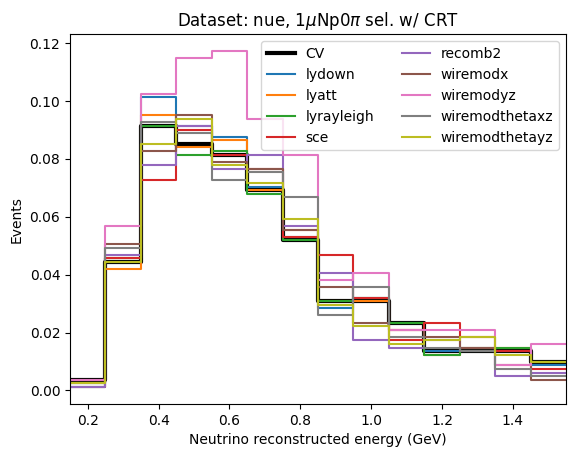

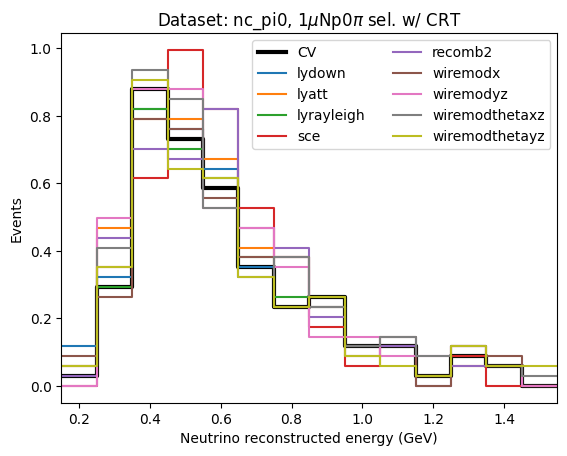

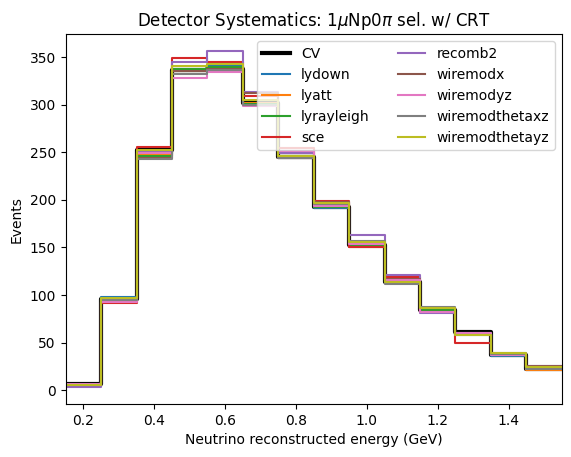

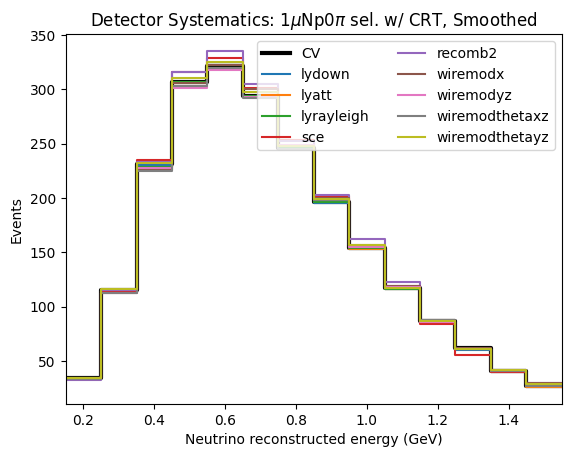

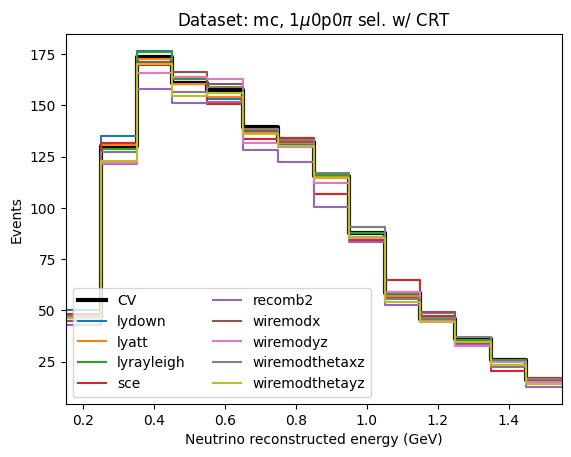

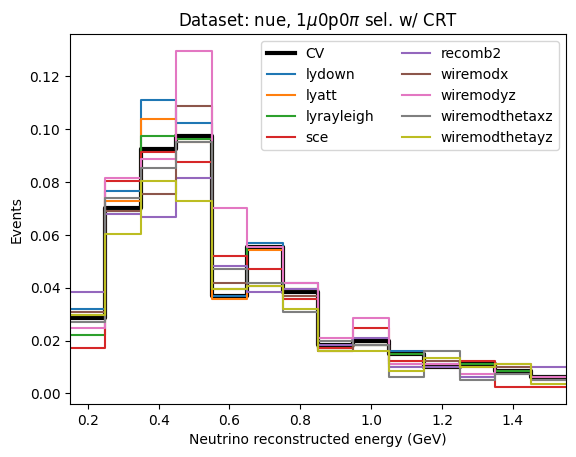

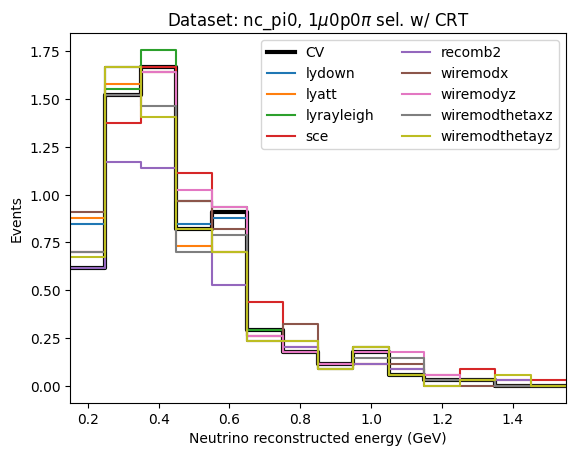

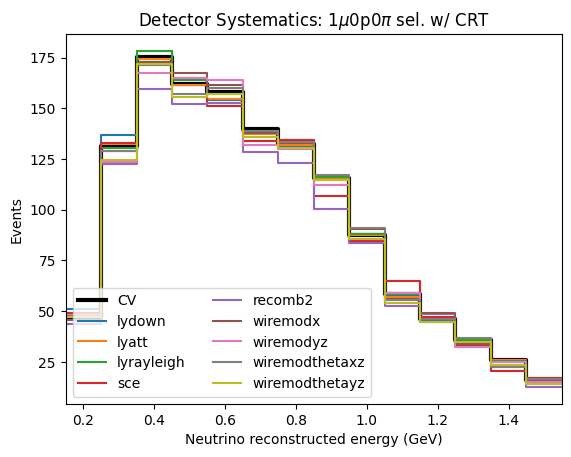

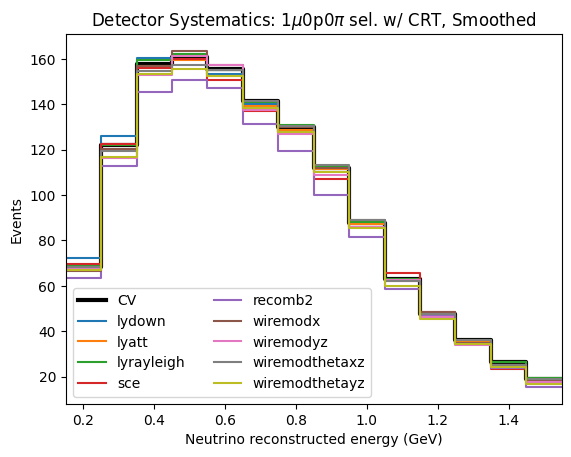

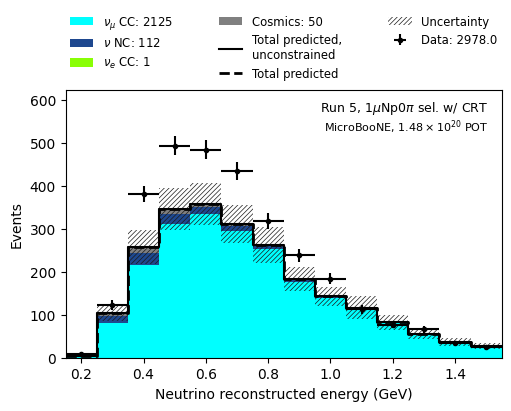

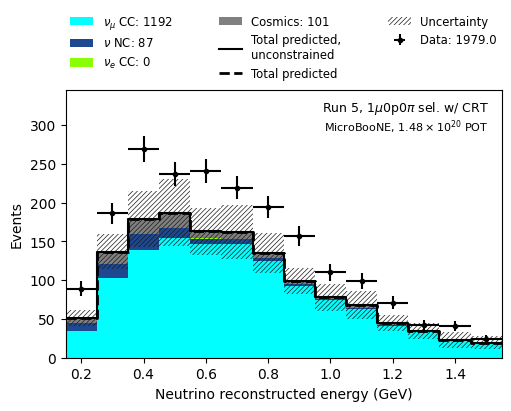

In [10]:
# now we loop over all runs to make these plots for each

for RUN in ["3_crt", "4b", "4c", "4d", "5"]:
    rundata_numu, mc_weights_numu, data_pot_numu = load_runs(
        [RUN],
        data="bnb",
        truth_filtered_sets=["nue", "drt"],
        loadshowervariables=False,
        loadrecoveryvars=False,
        loadsystematics=True,
        use_bdt=False,
        numupresel=True,
        loadnumuvariables=True,
        load_crt_vars=True,
        blinded=False, 
        enable_cache=True,
    )

    # if they don't exist yet, make the plot and cache directories
    os.makedirs(f"split_run_plots_output/numu_sideband_detvars/cache_run{RUN}", exist_ok=True)
    os.makedirs(f"split_run_plots_output/numu_sideband_detvars/plots_run{RUN}", exist_ok=True)
    numu_sideband_detvars = make_variations(
        [RUN],
        "bnb",
        binning=sideband_binning,
        make_plots=True,
        enable_detvar_cache=True,
        # Truth filter is the only difference w.r.t. the standard data (see config file)
        truth_filtered_sets=["nue","nc_pi0"],
        loadshowervariables=False,
        loadrecoveryvars=False,
        loadsystematics=True,
        use_bdt=False,
        numupresel=True,
        loadnumuvariables=True,
        load_crt_vars=True,
        blinded=False, 
        enable_cache=True,
        detvar_cache_dir=f"split_run_plots_output/numu_sideband_detvars/cache_run{RUN}",
        plot_output_dir=f"split_run_plots_output/numu_sideband_detvars/plots_run{RUN}",
    )

    numu_sideband_generator = RunHistGenerator(
        rundata_numu,
        sideband_binning,
        data_pot=data_pot_numu,
        uncertainty_defaults=None,
        detvar_data=numu_sideband_detvars
    )

    for channel in numu_sideband_generator.channels:
        RunHistPlotter(numu_sideband_generator).plot(
            category_column="paper_category_numu",
            include_multisim_errors=True,
            run_title=f"Run {RUN}",
            mb_preliminary=False,
            channel=channel,
            figsize=(5, 4)
        )
        plt.savefig(f"split_run_plots_output/numu_sideband_{channel}_run{RUN}.pdf")